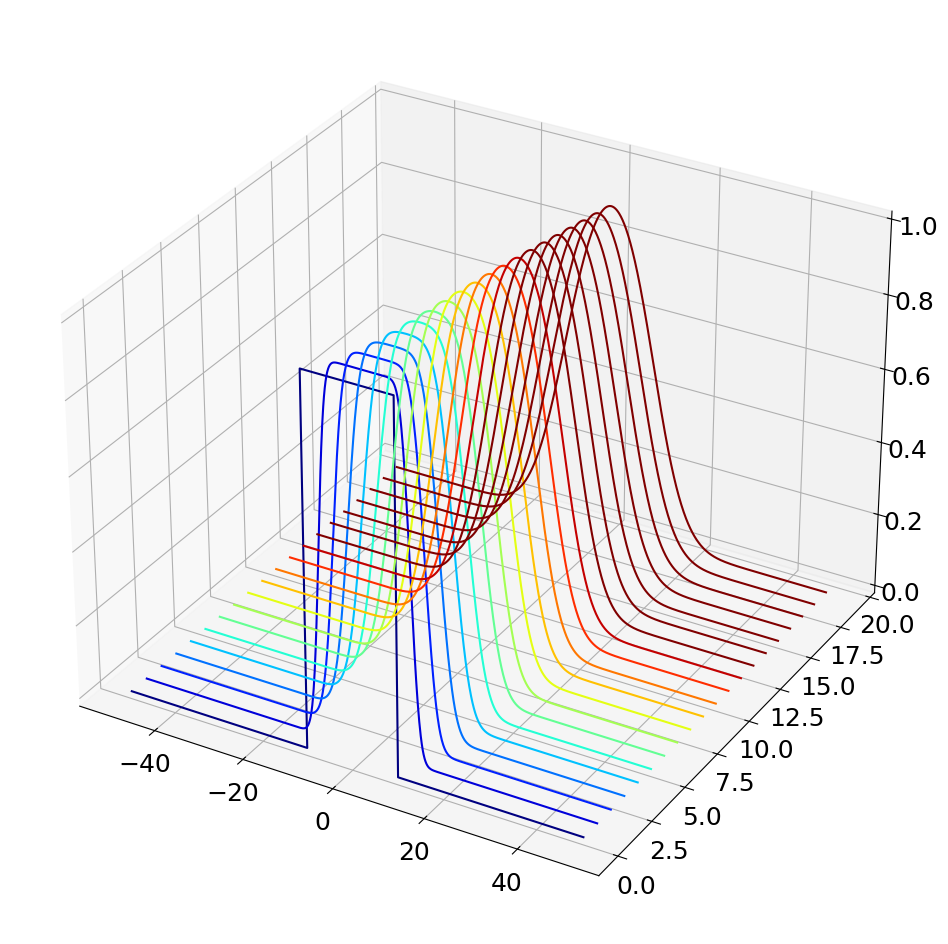

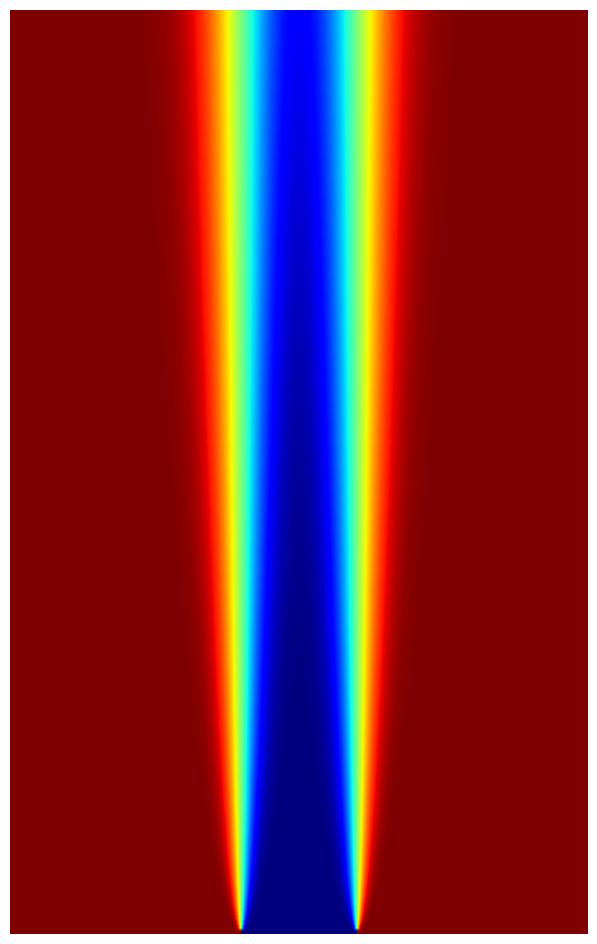

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import axes3d
import matplotlib.cm as cm
plt.rcParams['figure.figsize']=[12,12]
plt.rcParams.update({'font.size':18})

a=1  #thermal diffusion constant
L=100 #Lengthof domain
N=1000 #Number of discretization points
dx=L/N
x=np.arange(-L/2,L/2,dx) #define x domain

#define discrete wavenumbers
kappa=2*np.pi*np.fft.fftfreq(N,d=dx)

#initial conditions
u0=np.zeros_like(x)
u0[int((L/2-L/10)/dx):int((L/2+L/10)/dx)]=1
u0hat=np.fft.fft(u0)

u0hat_ri=np.concatenate((u0hat.real,u0hat.imag))

#simulate in fourier frequency domain
dt=0.1
t=np.arange(0,20,dt)

def rhsHeat(uhat_ri,t,kappa,a):
  uhat=uhat_ri[:N]+(1j)*uhat_ri[N:]
  d_uhat=-a**2*(np.power(kappa,2))*uhat
  d_uhat_ri=np.concatenate((d_uhat.real,d_uhat.imag)).astype("float64")
  return d_uhat_ri

uhat_ri=odeint(rhsHeat,u0hat_ri,t,args=(kappa,a))
uhat=uhat_ri[:,:N]+(1j)*uhat_ri[:,N:]
u=np.zeros_like(uhat)
for k in range(len(t)):
  u[k,:]=np.fft.ifft(uhat[k,:])

u=u.real



fig=plt.figure()
ax=fig.add_subplot(111,projection="3d")
plt.set_cmap('jet_r')
u_plot=u[0:-1:10,:]

for j in range(u_plot.shape[0]):
  ys=j*np.ones(u_plot.shape[1])
  ax.plot(x,ys,u_plot[j,:],color=cm.jet(j*20))
plt.figure()
plt.imshow(np.flipud(u),aspect=8)
plt.axis("off")
plt.set_cmap("jet_r")
plt.show()

## Solving ut+c.ux=0

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import  odeint
c=2
L=20
N=1000
dx=L/N

x=np.arange(-L/2,L/2,dx)
kappa=np.pi*2*np.fft.fftfreq(N,d=dx)
u0=np.cosh(x)


u0_hat=np.fft.fft(u0)
u0_hat_ri=np.concatenate((u0_hat.real,u0_hat.imag))

dt=0.025
t=np.arange(0,100*dt,dt)


def dudt_hat(u_hat,x, kappa,c ):
  uhat=u_hat[:N] +(1j)*u_hat[N:]
  d_uhat=-c*(1j)*kappa*uhat
  d_uhat_ri=np.concatenate((d_uhat.real,d_uhat.imag)).astype("float64")

  return d_uhat_ri

u_hat_ri=odeint(dudt_hat,u0_hat_ri, t,args=(kappa,c))
u_hat=u_hat_ri[:N] +(1j)*u_hat_ri[N:]

u_hat